<center><h1>Universiad Politecnica Salesiana</h1></center>
<center><h2>Examen Interciclo</h2></center>
<center><h3>Jonathan Uzhca</h3></center>
<center><h1>Simulacion</h1></center>


-`Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
- Obtener datos de tendencia de twitter o facebook, para ello se puede obtener a través del API [4].
-`Title: Titulo del Post/Twitter
    - Word count: la cantidad de palabras del artículo,
    - numero of Links: los enlaces externos que contiene,
    - numero of comments: cantidad de comentarios,
    - numero Shares: compartidos.
    - HashTag
    - Etc.


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from facebook_scraper import get_posts
import numpy as np
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
def contador(post):
    cont=0
    for char in post:        
            cont+=1
    return cont

Vamos a estraer los datos por publicaciones  para el candidato  a la eleccion

In [26]:
publicaciones = [] 

for post in get_posts('LassoGuillermo', pages=10):
        post['Word count'] = len(post['text'])
        publicaciones.append(post)          
facebook_posts = pd.DataFrame(publicaciones)


Vamos a listar todo las listas donde se van  a guardar las publicaciones  obtenidoas para nuestras prediccioens y  nuestro desarrollo del examen 
    -vamos a optener los datos de las publicaciones del candidato  guillermo lasso

In [ ]:
posts = []
for post in get_posts('LassoGuillermo', pages=10):
    post['numWord']=contador(post['text'])
    posts.append(post)


    - vamos a optener los datos del candidato Paul carrasco para ver como  estas su cadindatura mediante las publicidades

In [ ]:
for post in get_posts('ecuarauz2021', pages=10):
    post['numWord']=contador(post['text'])    
    posts.append(post)    
fb_posts = pd.DataFrame(posts)

Vamos a leer los datos  del archivo  y  aescribirle en  el arvicho 

In [6]:
file = open("likes.txt","w") 
for like in fb_posts['likes']:
    file.write(str(like)+'\n')
file.close()

Vamos a verificar que datos tenes  y como estas estructurado todo  el archivo

In [8]:
fb_posts.head()

,post_id,text,post_text,shared_text,time,image,video,video_thumbnail,video_id,likes,comments,shares,post_url,link,user_id,images,numWord
0,4845903942117477,El Ecuador está listo para el CAMBIO 💪🏼.\n\nEn...,El Ecuador está listo para el CAMBIO 💪🏼.\n\nEn...,,2020-12-20 19:12:15,https://scontent.fcue6-1.fna.fbcdn.net/v/t1.0-...,None,None,None,1591,136,0,https://facebook.com/story.php?story_fbid=4845...,None,401049006603015,[https://scontent.fcue6-1.fna.fbcdn.net/v/t1.0...,190
1,4845372462170625,¡Hoy celebramos la cantonización de Sozoranga!...,¡Hoy celebramos la cantonización de Sozoranga!...,,2020-12-20 15:47:00,None,None,None,None,454,54,0,https://facebook.com/story.php?story_fbid=4845...,None,401049006603015,[],224
2,4844341652273706,Con la salud no se juega. Junto al Dr. Alfredo...,Con la salud no se juega. Junto al Dr. Alfredo...,,2020-12-20 10:38:01,None,https://video.fcue6-1.fna.fbcdn.net/v/t42.1790...,https://scontent.fcue6-1.fna.fbcdn.net/v/t15.5...,232917304870895,1081,183,0,https://facebook.com/watch?v=232917304870895,None,401049006603015,[],118
3,4841574735883731,¡GRACIAS LOJA!\n\nLa alegría por la llegada de...,¡GRACIAS LOJA!\n\nLa alegría por la llegada de...,,2020-12-19 18:45:41,https://scontent.fcue6-1.fna.fbcdn.net/v/t1.0-...,None,None,None,2359,242,0,https://facebook.com/story.php?story_fbid=4841...,None,401049006603015,[https://scontent.fcue6-1.fna.fbcdn.net/v/t1.0...,278
4,4841197019254836,"Con Guido Chiriboga , tenemos la #CapacidadPar...","Con Guido Chiriboga , tenemos la #CapacidadPar...",,2020-12-19 16:26:19,None,https://video.fcue6-1.fna.fbcdn.net/v/t42.1790...,https://scontent.fcue6-1.fna.fbcdn.net/v/t15.5...,401847227903830,719,73,0,https://facebook.com/watch?v=401847227903830,None,401049006603015,[],114


Vamos a realziar una pequeñas graficas que indiques como estan los datos

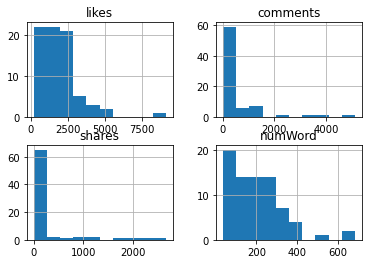

In [9]:
fb_posts.drop(['post_id','post_url', 'time'],1).hist()
plt.show()

Vamo a  ver como estan lso datos mediante una grafic para poder visualizar mejor los datos

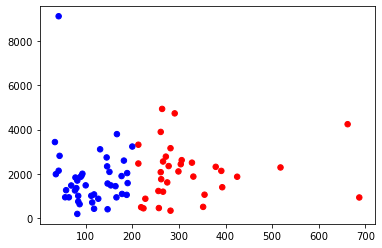

In [32]:
filtered_data = fb_posts[(fb_posts['numWord'] <= 3500) & (fb_posts['likes'] <= 80000)]
colores=['red','blue']

numerotr = filtered_data['numWord'].values
numeroLike = filtered_data['likes'].values

asignar=[]
for index, row in filtered_data.iterrows():
    if(row['numWord']>200):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(numerotr, numeroLike, c=asignar, s=tamanios[0])
plt.show()

Vamos a entrenar los datos  con las variables de entrada

In [33]:
dataX =filtered_data[["numWord"]]
X_train = np.array(dataX)
y_train = filtered_data['likes'].values

Vamos a crear la RegreSion Lienal

In [34]:
regr = linear_model.LinearRegression()

Creamos el objeto de la regresion lineal 

In [35]:
regr = linear_model.LinearRegression()

Vamos a entrenar lso datos que necesitamos  para el modelo 

In [36]:
regr.fit(X_train, y_train)

LinearRegression()

vamos a  hacer las predicciones definitivas para nuestro   examen

In [37]:
y_pred = regr.predict(X_train)

Vamos a ver los datos obtenidos 

In [38]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [0.82567859]


verificares el  error cuadratico medio

In [39]:
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))

Mean squared error: 1731438.93


Vamos  ver como esta la recta se se obtuvo para nuestra prediccion

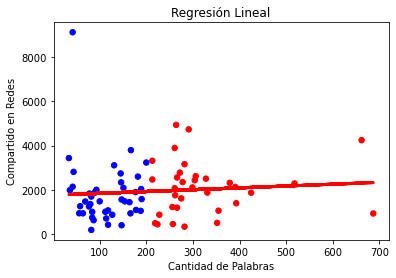

In [40]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')

plt.show()

Vamos a realizar un prediccion mediente la cnatidad  de link que  se optubo con el archivo y  vamos a crear algunas varias que  vamos a anecesitas pra hacer neustro procedimiento y ver como esta la votacion

In [17]:
import random

random.seed(1)
lasso_digits = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
arauz_digits = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

arauz_win_pct = 29.28
total_wards = 0
total_arauz_votes = 0
total_lasso_votes = 0
total_votes = 0

Vamos a a leer  el archivo y leer todo lso datos apr apdoer  ahcer nuestro prediccion  de votcion con los candidatos

In [19]:

for i in range(1000):
    my_input = open('likes.txt')
    for line in my_input:
        total_wards += 1
        fields = line.strip().split()
        num_voters = int(fields[0])
        arauz_votes_in_ward = 0
        lasso_votes_in_ward = 0
        for j in range(num_voters):
            random_num = random.random() * 100
            if random_num <= 69.13:
                lasso_votes_in_ward += 1
                total_lasso_votes += 1
            elif random_num <= (69.13 + 29.28) :
                arauz_votes_in_ward += 1
                total_arauz_votes += 1
            total_votes += 1
        arauz_digit = int(str(arauz_votes_in_ward)[0])
        lasso_digit = int(str(lasso_votes_in_ward)[0])
        arauz_digits[arauz_digit] += 1
        lasso_digits[lasso_digit] += 1


Vamos a imprimir los datos deseados par a lso candidatos que vamso a autilizar y  vamso a ver  como estas nuestras prediccion 

In [20]:
print('LASSO con:', 100.0 * total_arauz_votes / total_votes , '%')
print('ARAUZ con :', 100.0 * total_lasso_votes / total_votes, '%')

LASSO con: 29.279623589174403 %
ARAUZ con : 69.13073958088663 %


### Conclusion
Como vemos se a realizado  el examen y se obtenido  datos   y  se pudo  reliazar pronosticos de como estas  los canditos  con los respestivos  votos mediente las redes sociales  y como influye  sus  votos con  ayuda  de las regresion se puede dar a conocer  datos estadisticos   que nos ayude a ver como estan un probleme en el entorno del mundo real  y como influlle y dar un datos un pronostico  a futuro

### Bibliografia
- https://eprints.ucm.es/48804/1/TFM%20Manuel%20Alejandro%20Rodriguez%20Santana.pdf
- https://eprints.ucm.es/48804/1/TFM%20Manuel%20Alejandro%20Rodriguez%20Santana.pdf
- http://opac.pucv.cl/pucv_txt/txt-8000/UCC8094_01.pdf